In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import time

In [2]:
X_dim = 101 # sample: 11
Y_dim = 103 # sample: 7
T = 100

with open("input_14.txt", "r") as fh:
    robots = fh.readlines()

In [3]:
# Compose motion matrices for X and Y
X_matrix = np.zeros((len(robots), 2))
Y_matrix = np.zeros((len(robots), 2))
for i, r in enumerate(robots):
    result = re.findall(r"p=(-?\d+),(-?\d+) v=(-?\d+),(-?\d+)", r)[0]
    px, py = int(result[0]), int(result[1])
    vx, vy = int(result[2]), int(result[3])
    X_matrix[i] = [px, vx]
    Y_matrix[i] = [py, vy]

In [4]:
# 14a
final_X_coords = X_matrix.dot(np.array([[1], [T]])) % X_dim
final_Y_coords = Y_matrix.dot(np.array([[1], [T]])) % Y_dim
coordinates = list(zip(final_X_coords.ravel(), final_Y_coords.ravel()))
q1 = sum([1 for c in coordinates if int(c[0]) < int(X_dim/2) and int(c[1]) < int(Y_dim/2)])
q2 = sum([1 for c in coordinates if int(c[0]) > int(X_dim/2) and int(c[1]) < int(Y_dim/2)])
q3 = sum([1 for c in coordinates if int(c[0]) < int(X_dim/2) and int(c[1]) > int(Y_dim/2)])
q4 = sum([1 for c in coordinates if int(c[0]) > int(X_dim/2) and int(c[1]) > int(Y_dim/2)])
print("14a:", q1*q2*q3*q4)

14a: 231221760


In [10]:
# 14b
# This test (60% at bottom half) coincidentally found Christmas Tree in t_list (at t=6771).
t_list = []
for t in range(10000):
    x = X_matrix.dot(np.array([[1], [t]])) % X_dim
    y = -Y_matrix.dot(np.array([[1], [t]])) % Y_dim
    if sum(y < int(Y_dim/2))[0] / len(y) > 0.6:
        t_list.append(t)

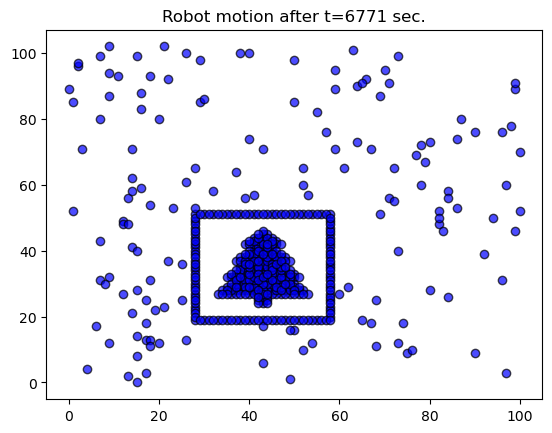

In [11]:
%matplotlib inline
for t in [6771]:
    x = X_matrix.dot(np.array([[1], [t]])) % X_dim
    y = -Y_matrix.dot(np.array([[1], [t]])) % Y_dim
    plt.scatter(x, y, c='blue', alpha=0.7, edgecolors='k')
    plt.title(f"Robot motion after t={t} sec.")
    plt.show()